## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:

import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer



import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv("D:\\Upgrad\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(df.shape)
df.describe()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
#observe the different feature type present in the data

print(df.dtypes)
print(df.info())


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share, fraud_share)

99.82725143693798 0.1727485630620034


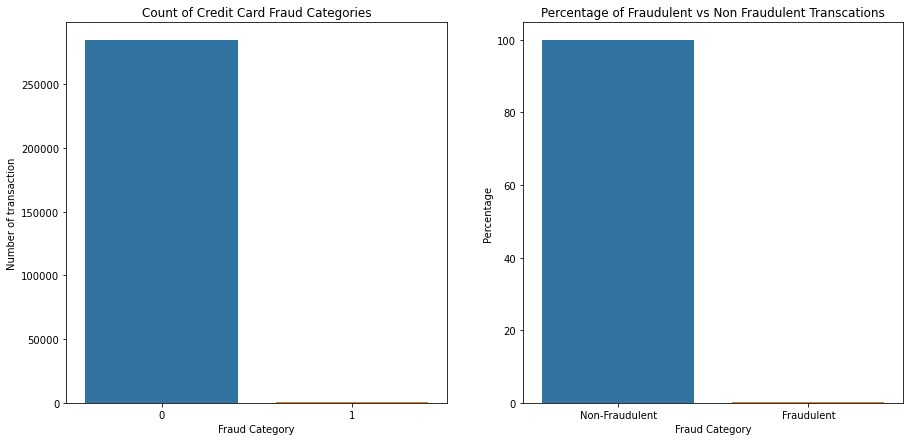

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Fraud Category")
plt.title("Count of Credit Card Fraud Categories")

plt.subplot(1,2,2)
fraud_percentage = {'Fraud Category':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Fraud Category',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of Fraudulent vs Non Fraudulent Transcations')

plt.show()


#### We can see that the data is highly imbalanced

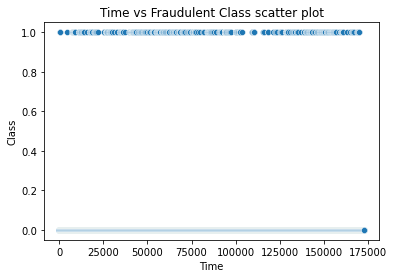

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(df["Time"], df["Class"])
plt.title("Time vs Fraudulent Class scatter plot")
plt.show()

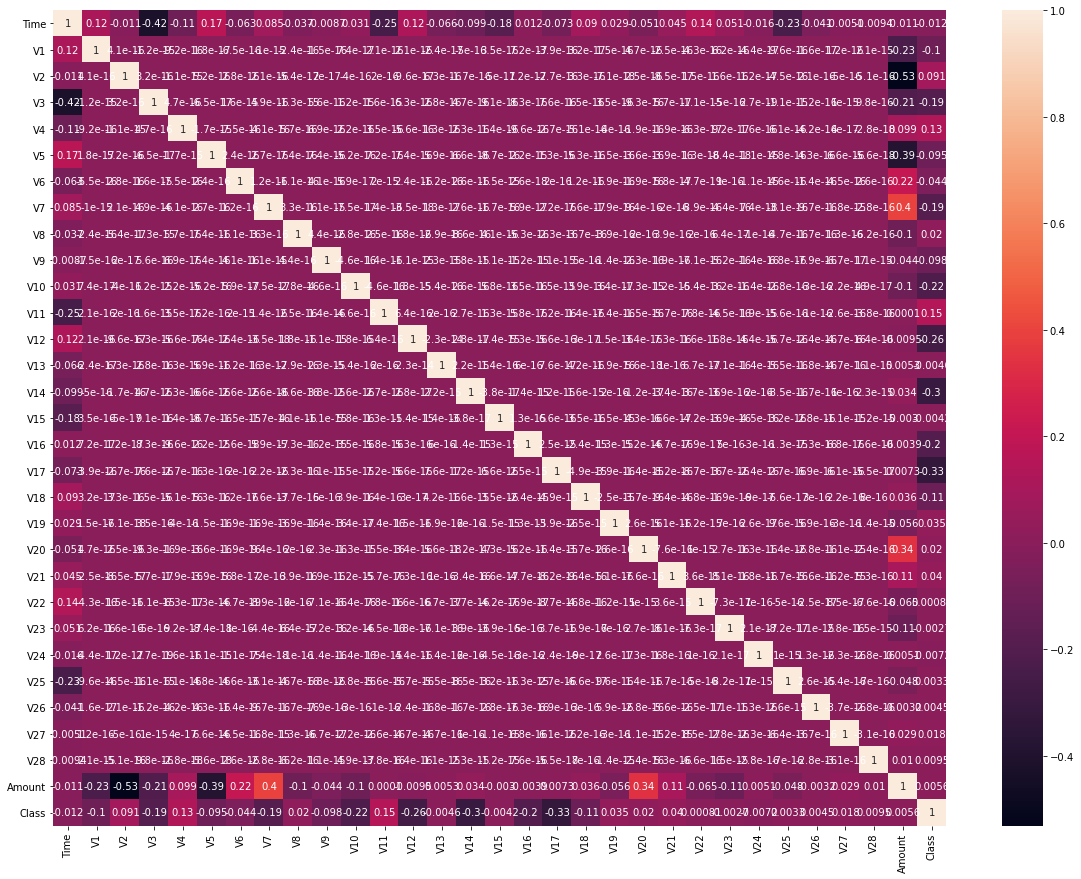

In [8]:
# plotting correlations on a heatmap
# correlation matrix
corelation = df.corr()
corelation
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(corelation, annot=True)
plt.show()

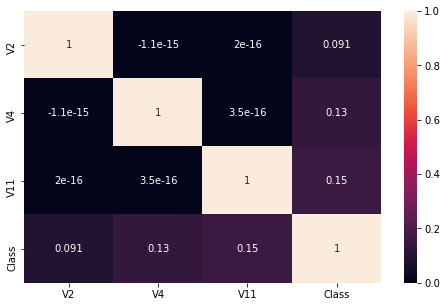

In [9]:
# Lets plot the heatmap again for relatively strong correlation (i.e. >0.09) with the target variable:

top_feature_map =corelation.index[abs(corelation['Class']>0.09)]
plt.subplots(figsize=(8, 5))
top_corr_feature = df[top_feature_map].corr()
sns.heatmap(top_corr_feature, annot=True)
plt.show()

#### We can see that both the type of fraud and non fraudulent cases are distributed overtime and hence time does not seem like a useful column to keep

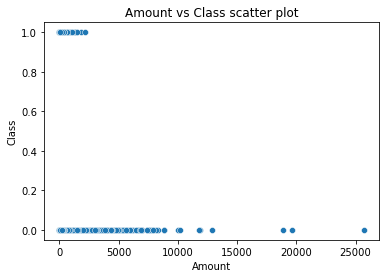

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Amount vs Class scatter plot")
plt.show()

#### We observe that low amount belong mostly to fraudulent cases

In [11]:
# Drop unnecessary columns
df = df.drop("Time", axis = 1)

### Splitting the data into train & test data

In [12]:
y= df["Class"]
x = df.drop("Class", axis = 1)

In [13]:
from sklearn import model_selection

X_train, X_test, y_train, y_test  = train_test_split(x, y, test_size=0.2, random_state = 50)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
404
88


### Plotting the distribution of a variable

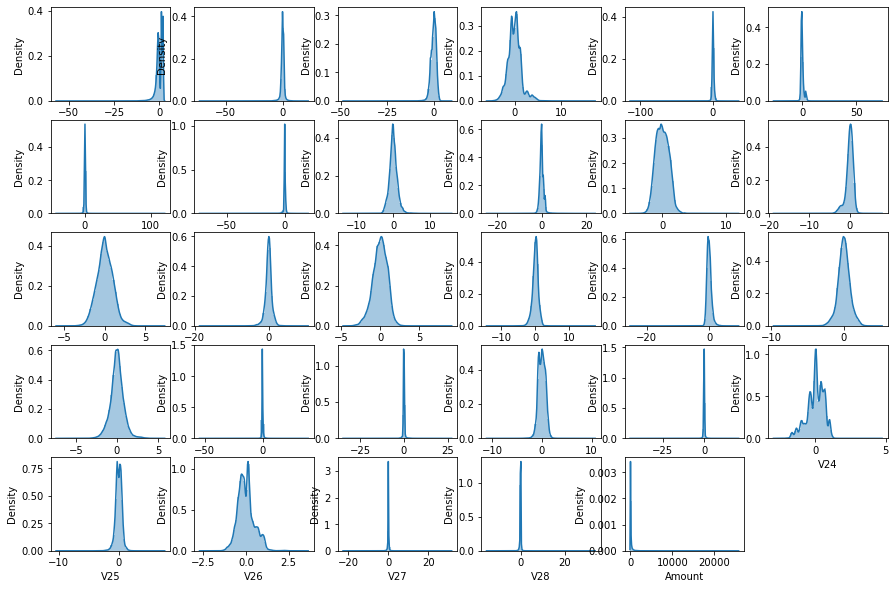

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
Xcolumns = X_train.columns

plt.figure(figsize=(15,10))
n=0
for col_name in Xcolumns:
    n += 1
    plt.subplot(5,6, n)
    sns.distplot(X_train[col_name])

plt.show()

In [16]:
# Lets check the skewness of the features
Xcolumns = X_train.columns
skewed_data_list = []
for i in Xcolumns:
    skewed_data_list.append(X_train[i].skew())

temp = pd.concat([pd.DataFrame(Xcolumns, columns=["Features"]), pd.DataFrame(skewed_data_list, columns=["Skewness"])], axis=1)
temp.set_index("Features", inplace=True)
temp.T
# Filtering the features which has skewness less than -1 and greater than +1
skewed = temp.loc[(temp["Skewness"] > 1) | (temp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pow_trans = PowerTransformer(copy=False)

# Fit the train data
X_train[skewed] = pow_trans.fit_transform(X_train[skewed])


# Transform the test data
X_test[skewed] = pow_trans.transform(X_test[skewed])

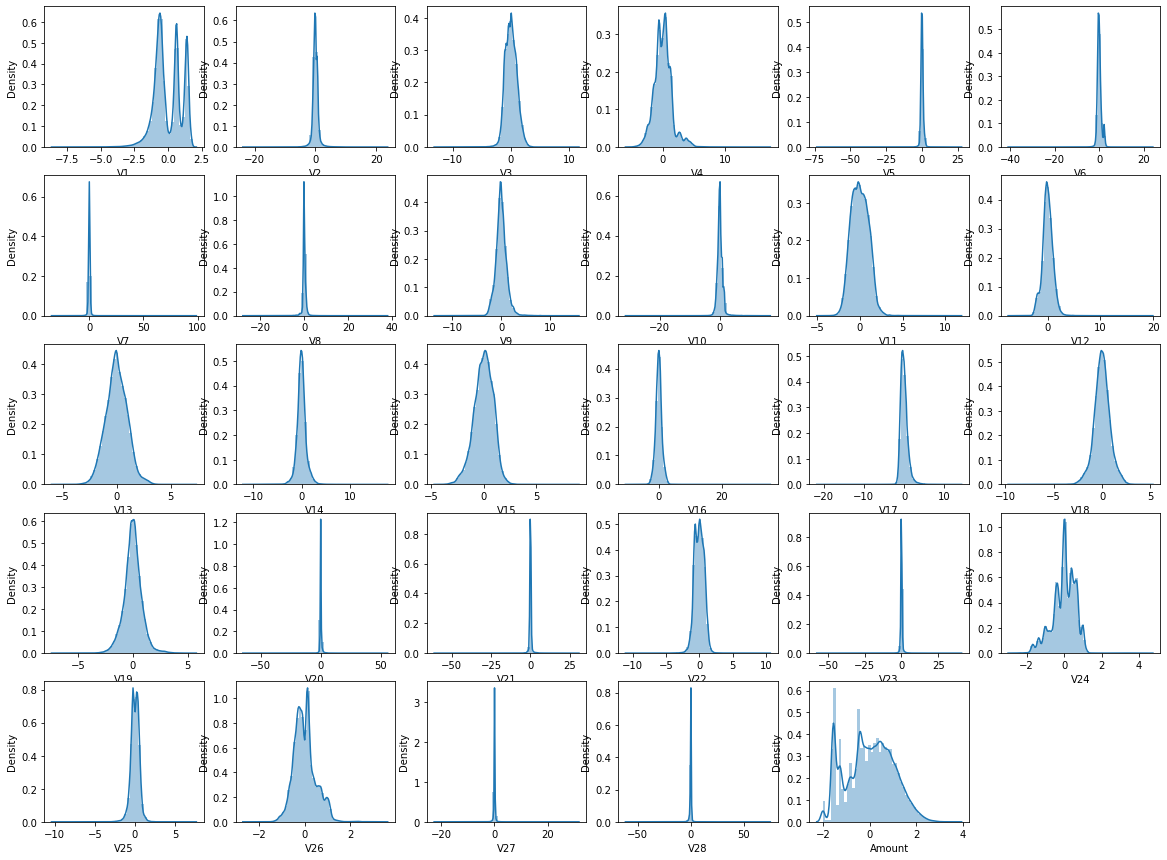

In [18]:
# plot the histogram of a variable from the dataset again to see the result 
Xcolumns = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in Xcolumns:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [19]:
# Logistic Regression
from sklearn import linear_model #import the package

parameters = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
Nfolds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_crossval = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#performing hyperparameter tuning
model_crossval.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_crossval.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_crossval.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9780568759508098
Best hyperparameters:  {'C': 0.01}


#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [20]:
#perform cross validation
crosval_results = pd.DataFrame(model_crossval.cv_results_)
crosval_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.318427,0.037730,0.037051,0.004240,0.01,{'C': 0.01},0.982443,0.971867,0.981952,0.973372,...,0.978057,0.004503,1,0.979774,0.984477,0.982976,0.983179,0.982514,0.982584,0.001549
1,2.078175,0.069956,0.030963,0.001725,0.1,{'C': 0.1},0.980470,0.968560,0.977119,0.969289,...,0.973731,0.004553,2,0.977087,0.982054,0.981047,0.981138,0.980885,0.980442,0.001726
2,2.376880,0.149001,0.031000,0.003521,1,{'C': 1},0.979211,0.968174,0.973794,0.967857,...,0.972053,0.004186,3,0.976258,0.981167,0.980474,0.980448,0.980282,0.979726,0.001760
3,2.456428,0.077986,0.034034,0.004403,10,{'C': 10},0.979014,0.968168,0.973176,0.967680,...,0.971810,0.004116,4,0.976161,0.981050,0.980404,0.980361,0.980203,0.979636,0.001761
4,2.476091,0.153714,0.034569,0.001657,100,{'C': 100},0.978991,0.968171,0.973110,0.967666,...,0.971786,0.004107,5,0.976152,0.981038,0.980398,0.980354,0.980197,0.979628,0.001762
5,2.107160,0.283638,0.022697,0.006158,1000,{'C': 1000},0.978991,0.968170,0.973104,0.967661,...,0.971783,0.004108,6,0.976151,0.981036,0.980396,0.980352,0.980197,0.979626,0.001761


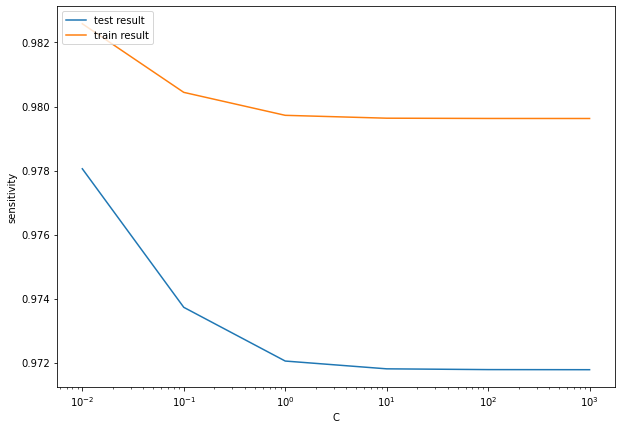

In [21]:
# plot of C versus train and validation scores
plt.figure(figsize=(10, 7))
plt.plot(crosval_results['param_C'], crosval_results['mean_test_score'])
plt.plot(crosval_results['param_C'], crosval_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [22]:
# Instantiating the model with best C
log_reg_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [23]:

def showRes(y_test, y_pred):
    
    print(f"F1 Score results: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report Results: \n {classification_report(y_test, y_pred)}")
    

In [24]:
# Predictions on the train set
y_train_predictions = log_reg_model.predict(X_train)

In [25]:
showRes(y_train, y_train_predictions)

F1 Score results: 76.97%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       0.91      0.67      0.77       404

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



In [26]:
# ROC Curve function
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

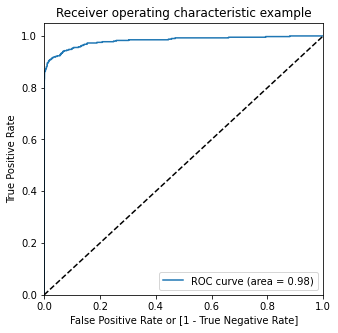

In [27]:
# Predicted probability
y_train_pred_proba = log_reg_model.predict_proba(X_train)[:,1]
# Plot the ROC curve
roc_curve(y_train, y_train_pred_proba)

In [29]:
# Making prediction on the test set
y_test_pred = log_reg_model.predict(X_test)
showRes(y_test, y_test_pred)

F1 Score results: 67.11%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.80      0.58      0.67        88

    accuracy                           1.00     56962
   macro avg       0.90      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



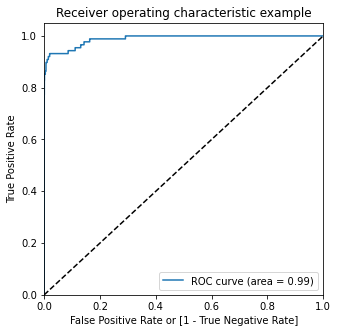

In [30]:
# Predicted probability
y_test_pred_proba = log_reg_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### 2. Decision Trees

In [31]:
# Create the parameter grid 
param_grid_params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
desctree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = desctree, 
                           param_grid = param_grid_params, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [32]:
# cv results
res_cv = pd.DataFrame(grid_search.cv_results_)
res_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.587444,0.028142,0.034370,0.001343,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.918168,0.948447,0.896102,0.920906,0.021457,4
1,3.616201,0.027818,0.033563,0.011910,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.918168,0.948435,0.896100,0.920901,0.021453,5
2,3.673144,0.049170,0.032582,0.007488,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941922,0.948261,0.914567,0.934917,0.014620,1
3,3.729074,0.025730,0.036667,0.002953,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.941922,0.948261,0.907169,0.932451,0.018063,2
4,7.547832,0.039785,0.033937,0.001868,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.899953,0.930196,0.916652,0.915601,0.012369,7
5,8.027028,0.183691,0.033027,0.001421,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.899951,0.930187,0.946148,0.925429,0.019158,3
6,8.303635,0.282502,0.034219,0.004468,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.899878,0.936808,0.908452,0.915046,0.015781,8
7,8.348981,0.164808,0.031319,0.002881,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.899890,0.936808,0.915787,0.917495,0.015120,6


In [33]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9349165427204772
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [34]:
# Model with optimal hyperparameters
desctree_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

desctree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [46]:
y_train_pred = desctree_model.predict(X_train)
showRes(y_train, y_train_pred)

F1 Score results: 73.96%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       0.78      0.70      0.74       404

    accuracy                           1.00    227845
   macro avg       0.89      0.85      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [49]:
#Evaluating the model on test data
y_test_pred = desctree_model.predict(X_test)
(y_test, y_test_pred)

F1 Score results: 65.14%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.66      0.65      0.65        88

    accuracy                           1.00     56962
   macro avg       0.83      0.82      0.83     56962
weighted avg       1.00      1.00      1.00     56962



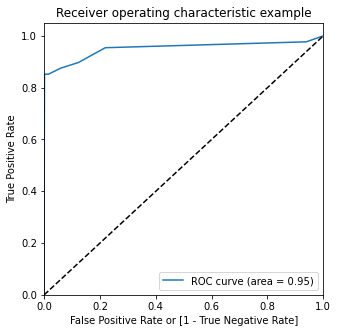

In [50]:
# Predicted probability
y_test_pred_proba = desctree_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

### 3. XGBoost 

In [51]:

# creating a KFold object 
Nfolds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[19:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:27]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [41]:
# cv results
res_cv = pd.DataFrame(model_cv.cv_results_)
res_cv

print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)


Best roc auc score :  0.9816253157836202
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [42]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [53]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_model = XGBClassifier(params = params)
xgb_model.fit(X_train, y_train)

[19:44:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:44:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [54]:
# Predictions on the train set
y_train_pred = xgb_model.predict(X_train)

showRes(y_train, y_train_pred)

F1 Score results: 100.0%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       1.00      1.00      1.00       404

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



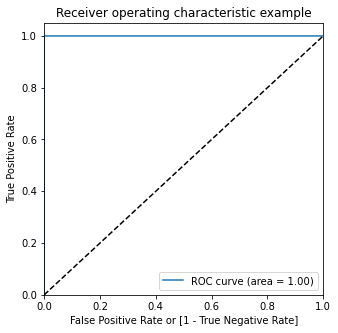

In [55]:
# Predicted probability
y_train_pred_proba_xgb = xgb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
roc_curve(y_train, y_train_pred_proba_xgb)

### Models Summary

### Logistic Regression
Model Summary
Train set

ROC : 98%
F1 Score: 73.76%
Test set

ROC : 98%
F1 score: 70.3%

### Decision Tree
Model Summary
Train set

ROC Score: 99%
F1 score : 72.33%
Test set

ROC Score: 96%
F1 score : 71.88%

### XGBoost
Model Summary

Train set
ROC score: 100%
F1 score: 100.0%

Test set
ROC score: 98%
F1 score: 88.27%

XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on the train data is 100% and on test data 98%.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

### XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on the train data is 100% and on test data 98%.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


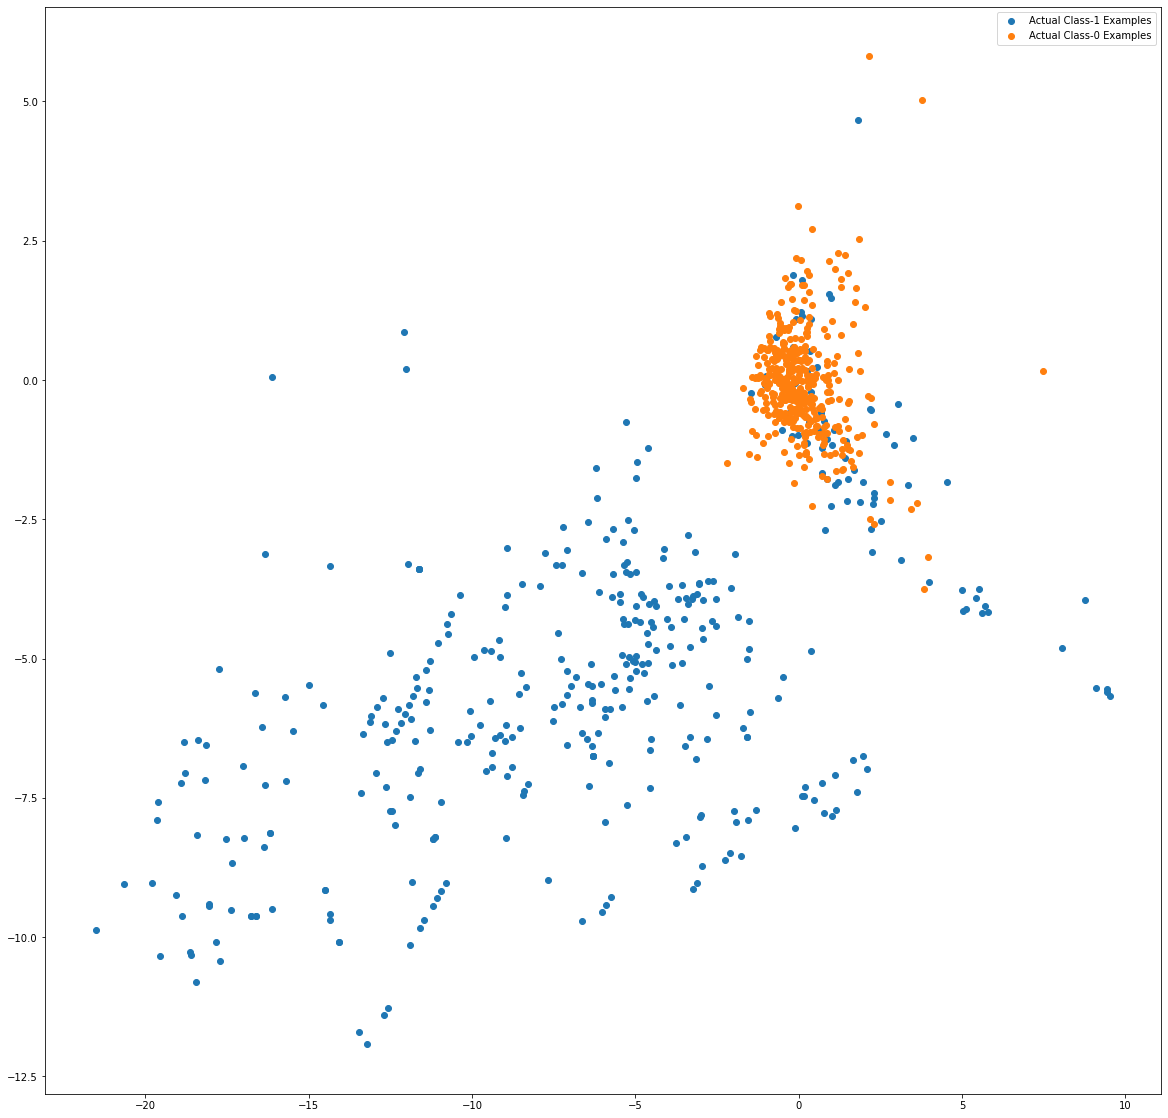

In [60]:
var_imp = []
for i in xgb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [61]:
#!pip install imblearn

In [62]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversampleRandom = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversampleRandom.fit_resample(X_train, y_train)

from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227441, 1: 404})
New class distribution:- Counter({0: 227441, 1: 227441})


In [63]:
# Creating KFold object with 5 splits
Nfolds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params_list = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params_list, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9852487646787722
Best hyperparameters:  {'C': 1000}


In [66]:
# cross validation results
res_cv = pd.DataFrame(model_cv.cv_results_)
res_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.399549,0.097908,0.032865,0.010698,0.01,{'C': 0.01},0.985233,0.985280,0.984988,0.985536,...,0.985206,0.000204,6,0.985262,0.985178,0.985213,0.985230,0.985243,0.985225,0.000029
1,1.412544,0.081667,0.035979,0.010650,0.1,{'C': 0.1},0.985287,0.985296,0.985020,0.985579,...,0.985245,0.000203,5,0.985304,0.985218,0.985250,0.985266,0.985288,0.985265,0.000030
2,1.350965,0.095403,0.029721,0.007496,1,{'C': 1},0.985293,0.985294,0.985021,0.985583,...,0.985248,0.000203,4,0.985306,0.985223,0.985253,0.985270,0.985291,0.985268,0.000029
3,1.394593,0.096272,0.027457,0.005473,10,{'C': 10},0.985293,0.985295,0.985021,0.985583,...,0.985249,0.000203,3,0.985307,0.985223,0.985253,0.985270,0.985292,0.985269,0.000029
4,1.448484,0.143512,0.027904,0.006859,100,{'C': 100},0.985293,0.985295,0.985021,0.985583,...,0.985249,0.000203,2,0.985307,0.985223,0.985253,0.985270,0.985292,0.985269,0.000029
5,1.469530,0.166510,0.029430,0.007368,1000,{'C': 1000},0.985293,0.985295,0.985021,0.985583,...,0.985249,0.000203,1,0.985307,0.985223,0.985253,0.985270,0.985292,0.985269,0.000029


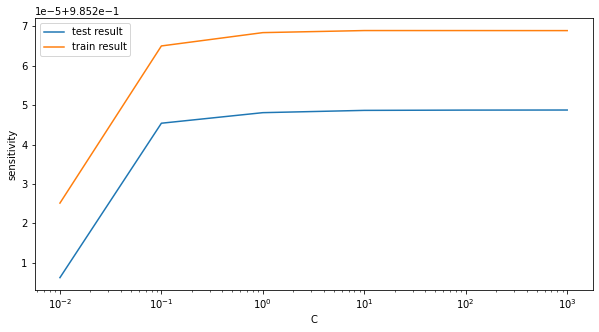

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(res_cv['param_C'], res_cv['mean_test_score'])
plt.plot(res_cv['param_C'], res_cv['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [68]:
model_cv.best_params_

{'C': 1000}

In [70]:
# Instantiating the model
logreg = LogisticRegression(C=1000)

# Fitting the model with train data
logregover_model = logreg.fit(X_over, y_over)

# Predictions on the train set
y_train_pred = logregover_model.predict(X_over)

# Printing scores
showRes(y_over, y_train_pred)

F1 Score results: 94.52%
Classification Report Results: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227441
           1       0.97      0.92      0.95    227441

    accuracy                           0.95    454882
   macro avg       0.95      0.95      0.95    454882
weighted avg       0.95      0.95      0.95    454882



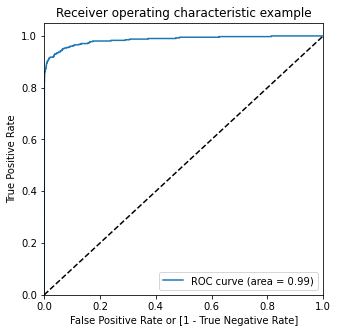

In [71]:
# Predicted probability
y_train_pred_proba = logregover_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
roc_curve(y_over, y_train_pred_proba)

Model Summary

Train set
ROC score : 99%
F1 score: 94.34%

Test set
ROC score : 98%
F1 score: 10.54%

### 2. Decision Tree with Random Oversampling

In [72]:
# Create the parameter grid 
param_grid_ranges = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
desctree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = desctree, 
                           param_grid = param_grid_ranges, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [73]:
print("Optimal roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Optimal roc auc score :  0.9994949018208903
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [74]:
# Model with optimal hyperparameters
descTree_model_over = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

descTree_model_over.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [76]:
# Predictions on the train set
y_train_pred = descTree_model_over.predict(X_over)
showRes(y_over, y_train_pred)

F1 Score results: 99.66%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227441
           1       0.99      1.00      1.00    227441

    accuracy                           1.00    454882
   macro avg       1.00      1.00      1.00    454882
weighted avg       1.00      1.00      1.00    454882



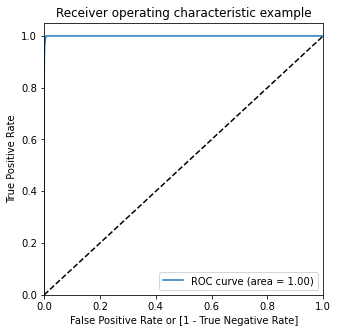

In [77]:
# Predicted probability
y_train_pred_proba = descTree_model_over.predict_proba(X_over)[:,1]
# Plot the ROC curve
roc_curve(y_over, y_train_pred_proba)

In [79]:
# Evaluating model on the test data
y_test_pred = descTree_model_over.predict(X_test)
showRes
(y_test, y_test_pred)

(40312     0
 8353      0
 100133    0
 113766    0
 31765     0
          ..
 183032    0
 86058     0
 88599     0
 253742    0
 252717    0
 Name: Class, Length: 56962, dtype: int64,
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

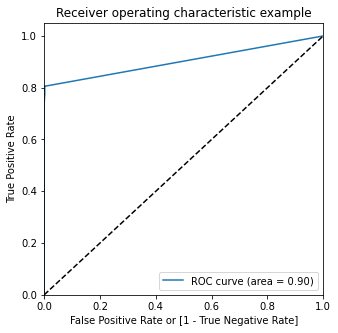

In [80]:
# Predicted probability
y_test_pred_proba = descTree_model_over.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

#### Model Summary
Train set
ROC score : 100%
F1 score: 99.43%

Test set
ROC score : 85%
F1 score: 28.83%

### 3. XGBoost with Random Oversampling

In [81]:
# creating a KFold object 
Nfolds = 3

# specify range of hyperparameters
param_grid_dict = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid_dict, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:03:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:04:38]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [82]:
# cv results
res_cv = pd.DataFrame(model_cv.cv_results_)
res_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,13.680809,0.122669,0.084857,0.006993,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999896,0.999912,0.999910,0.999906,0.000007,5,0.999914,0.999926,0.999912,0.999917,6.196418e-06
1,17.411082,0.113373,0.082995,0.001162,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999904,0.999904,0.999909,0.999906,0.000002,6,0.999922,0.999919,0.999915,0.999918,2.864156e-06
2,20.307734,1.193504,0.081192,0.002943,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999899,0.999912,0.999909,0.999907,0.000005,4,0.999923,0.999923,0.999911,0.999919,5.500291e-06
3,14.749095,0.670010,0.086389,0.004415,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999987,0.999962,0.999975,0.999975,0.000010,3,0.999998,0.999998,0.999998,0.999998,1.583142e-07
4,18.856510,0.395842,0.080755,0.001645,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999983,0.999972,0.999971,0.999975,0.000005,2,0.999998,0.999997,0.999999,0.999998,5.352827e-07
5,20.919956,0.467521,0.086876,0.005236,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999988,0.999986,0.999966,0.999980,0.000010,1,0.999997,0.999999,0.999998,0.999998,1.002629e-06


In [83]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999802355777394
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [84]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [85]:
# chosen hyperparameters
params_dict = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params_dict)
xgb_over_model.fit(X_over, y_over)

[20:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:09:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [87]:
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

showRes(y_over, y_train_pred)

F1 Score results: 100.0%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       1.00      1.00      1.00    227441

    accuracy                           1.00    454882
   macro avg       1.00      1.00      1.00    454882
weighted avg       1.00      1.00      1.00    454882



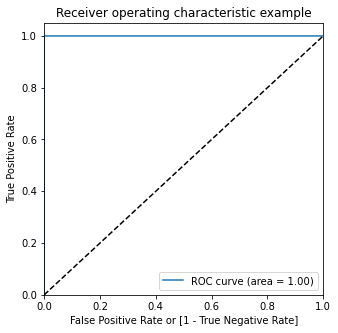

In [88]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
roc_curve(y_over, y_train_pred_proba)

In [89]:
#Evaluating on test set
y_pred = xgb_over_model.predict(X_test)
showRes(y_test, y_pred)

F1 Score results: 83.44%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.91      0.77      0.83        88

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



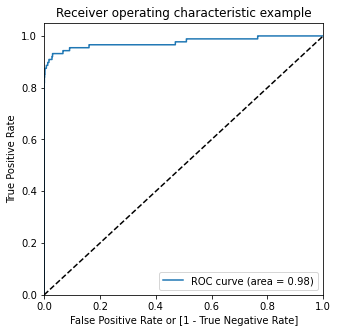

In [90]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

#### Model Summary

Train set
ROC score : 100.0%
F1 score: 100.0%

Test set
ROC score : 98%
F1 score: 89.01%

### Print the class distribution after applying SMOTE 

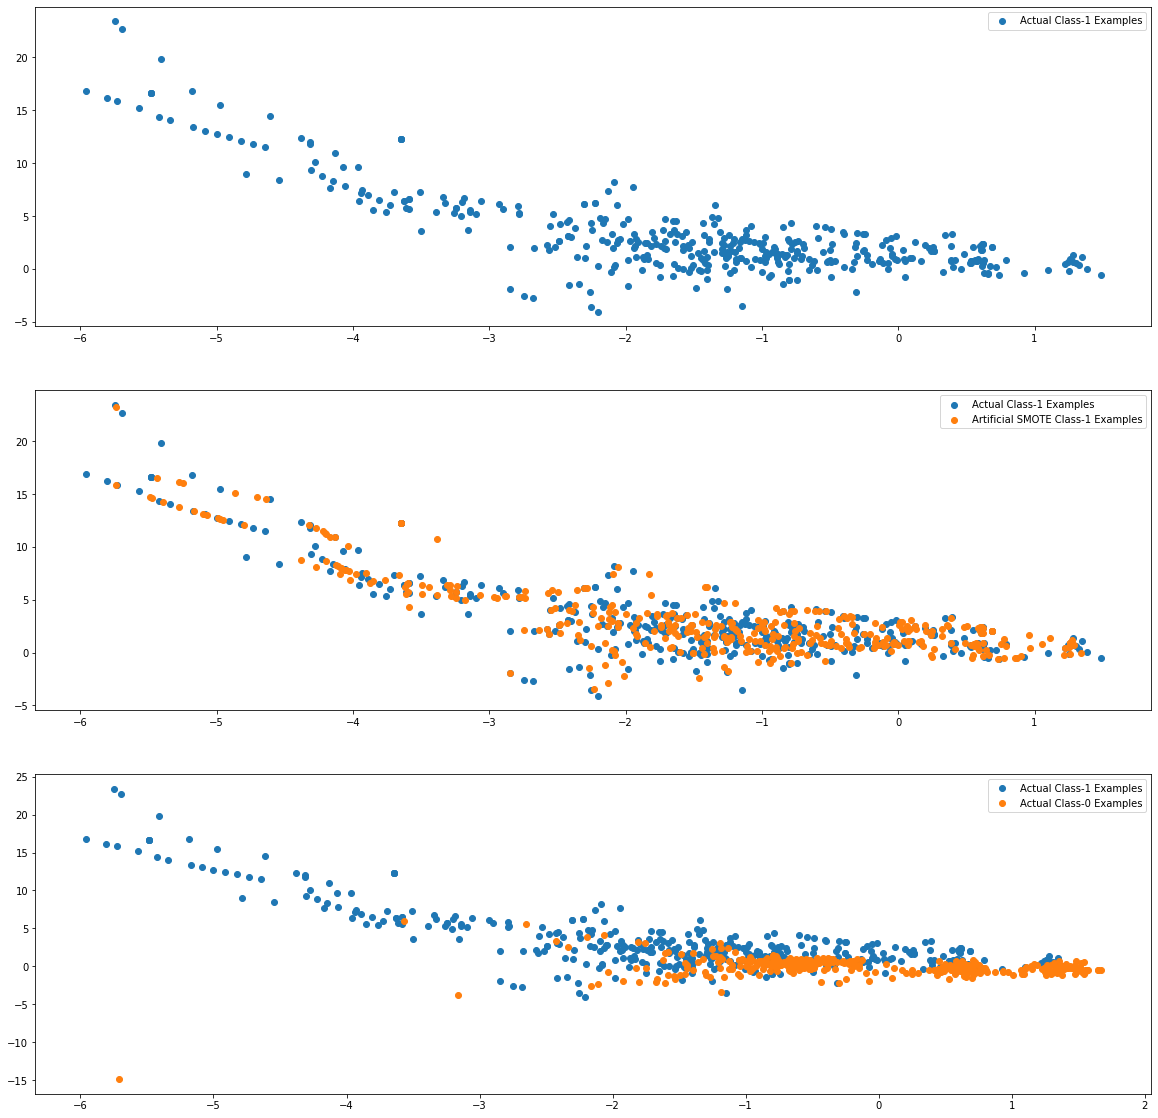

In [91]:
import warnings
warnings.filterwarnings("ignore")


from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### 1. Logistic Regression on balanced data with SMOTE

In [93]:
# Creating KFold object with 5 splits
Nfolds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params_dict = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params_dict, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9884423439234379
Best hyperparameters:  {'C': 10}


In [94]:
#cross validation results
cv_res = pd.DataFrame(model_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.288582,0.059109,0.034768,0.006625,0.01,{'C': 0.01},0.988690,0.988181,0.988115,0.988530,...,0.988419,0.000228,6,0.988408,0.988474,0.988499,0.988411,0.988367,0.988432,0.000048
1,1.310081,0.085847,0.035535,0.005285,0.1,{'C': 0.1},0.988728,0.988190,0.988137,0.988544,...,0.988441,0.000235,5,0.988430,0.988496,0.988522,0.988432,0.988396,0.988455,0.000047
2,1.303804,0.083725,0.027578,0.005133,1,{'C': 1},0.988731,0.988189,0.988138,0.988543,...,0.988442,0.000236,4,0.988430,0.988496,0.988523,0.988432,0.988397,0.988456,0.000046
3,1.473944,0.071658,0.034790,0.005124,10,{'C': 10},0.988731,0.988190,0.988138,0.988543,...,0.988442,0.000236,1,0.988430,0.988496,0.988523,0.988432,0.988398,0.988456,0.000046
4,1.363984,0.055060,0.036255,0.005720,100,{'C': 100},0.988731,0.988190,0.988138,0.988543,...,0.988442,0.000236,3,0.988430,0.988496,0.988523,0.988432,0.988398,0.988456,0.000047
5,1.462056,0.122986,0.042931,0.006920,1000,{'C': 1000},0.988731,0.988190,0.988138,0.988543,...,0.988442,0.000236,2,0.988430,0.988496,0.988523,0.988432,0.988398,0.988456,0.000047


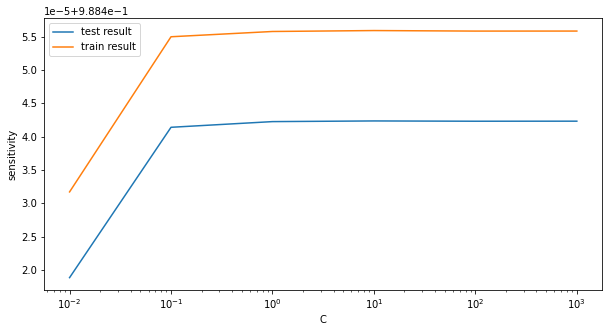

In [96]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(cv_res['param_C'], cv_res['mean_test_score'])
plt.plot(cv_res['param_C'], cv_res['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [97]:
# Printing best params
model_cv.best_params_

{'C': 10}

In [99]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
showRes(y_train_smote, y_train_pred)

F1 Score results: 94.49%
Classification Report Results: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227441
           1       0.97      0.92      0.94    227441

    accuracy                           0.95    454882
   macro avg       0.95      0.95      0.95    454882
weighted avg       0.95      0.95      0.95    454882



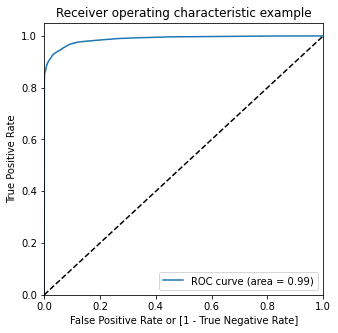

In [100]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
roc_curve(y_train_smote, y_train_pred_proba_smote)

In [101]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
showRes(y_test, y_test_pred)

F1 Score results: 9.54%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56874
           1       0.05      0.92      0.10        88

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



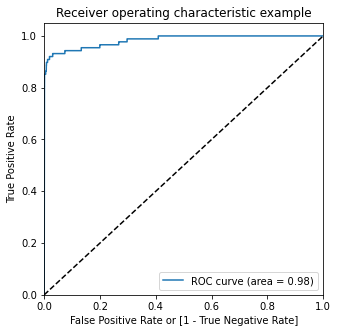

In [102]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba_smote)

#### Model Summary
Train set
ROC score : 99%
F1 score: 94.23%

Test set
ROC score : 98%
F1 score: 9.79%

#### 2. Decision Tree on balanced data with SMOTE

In [103]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
desctree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = desctree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [104]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9980976929586087
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [105]:
#Optimal Parameters 
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}

In [106]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [108]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
showRes(y_train_smote, y_train_pred_smote)

F1 Score results: 98.72%
Classification Report Results: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227441
           1       0.99      0.99      0.99    227441

    accuracy                           0.99    454882
   macro avg       0.99      0.99      0.99    454882
weighted avg       0.99      0.99      0.99    454882



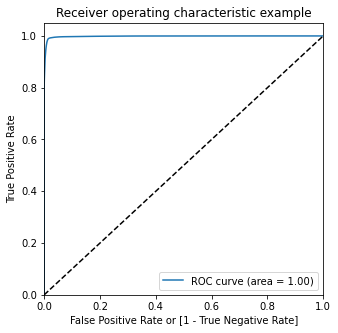

In [109]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
roc_curve(y_train_smote, y_train_pred_proba)

In [110]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
showRes(y_test, y_pred)

F1 Score results: 14.6%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56874
           1       0.08      0.86      0.15        88

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



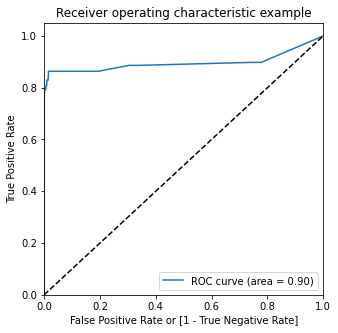

In [111]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_smote)

#### Model Summary

Train set
ROC score : 100%
F1 score: 98.61%

Test set
ROC score : 92%
F1 score: 15.62%

#### 3. XGBoost on balanced data with SMOTE

In [112]:
# creating a KFold object 
Nfolds = 3

# specify range of hyperparameters
param_grid_dict = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid_dict, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:51:45]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [113]:
# cv results
res_cv = pd.DataFrame(model_cv.cv_results_)
res_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.711740,0.146627,0.094472,0.004613,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999657,0.999620,0.999635,0.999637,1.525665e-05,5,0.999702,0.999655,0.999653,0.999670,2.287096e-05
1,23.465090,0.249204,0.089312,0.007657,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999651,0.999628,0.999644,0.999641,9.549191e-06,4,0.999698,0.999667,0.999666,0.999677,1.471978e-05
2,28.080610,0.126685,0.091881,0.003881,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999637,0.999622,0.999628,0.999629,6.171531e-06,6,0.999686,0.999663,0.999656,0.999668,1.244845e-05
3,16.437699,0.095382,0.080425,0.003249,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999946,0.999947,0.999946,0.999946,3.676349e-07,3,0.999973,0.999974,0.999970,0.999972,1.428782e-06
4,25.271526,0.096994,0.086772,0.001735,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999946,0.999940,0.999954,0.999947,5.741857e-06,2,0.999979,0.999981,0.999980,0.999980,9.266233e-07
5,30.610986,0.149745,0.088156,0.002870,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999952,0.999943,0.999958,0.999951,6.026918e-06,1,0.999981,0.999985,0.999985,0.999984,2.167034e-06


In [114]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999508987496121
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [115]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [116]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)

[21:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:24:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [117]:
#Evaluating on Train data
y_train_pred = xgb_smote_model.predict(X_train_smote)
showRes(y_train_smote, y_train_pred)

F1 Score results: 100.0%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       1.00      1.00      1.00    227441

    accuracy                           1.00    454882
   macro avg       1.00      1.00      1.00    454882
weighted avg       1.00      1.00      1.00    454882



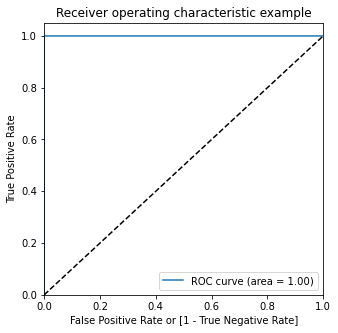

In [118]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
roc_curve(y_train_smote, y_train_pred_proba)

In [120]:
#Evaluating on Test data
y_pred = xgb_smote_model.predict(X_test)
showRes(y_test, y_pred)

F1 Score results: 76.67%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.75      0.78      0.77        88

    accuracy                           1.00     56962
   macro avg       0.87      0.89      0.88     56962
weighted avg       1.00      1.00      1.00     56962



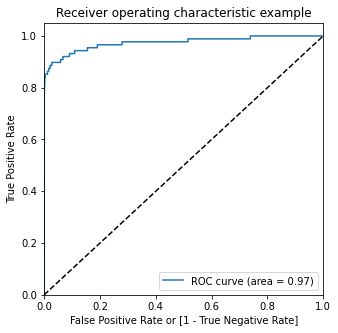

In [121]:
# Predicted probability
y_test_pred_proba = xgb_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

#### Model Summary

Train set
ROC score : 100.0%
F1 score: 100.0%

Test set
ROC score : 99%
F1 score: 80.95%

### Print the class distribution after applying ADASYN

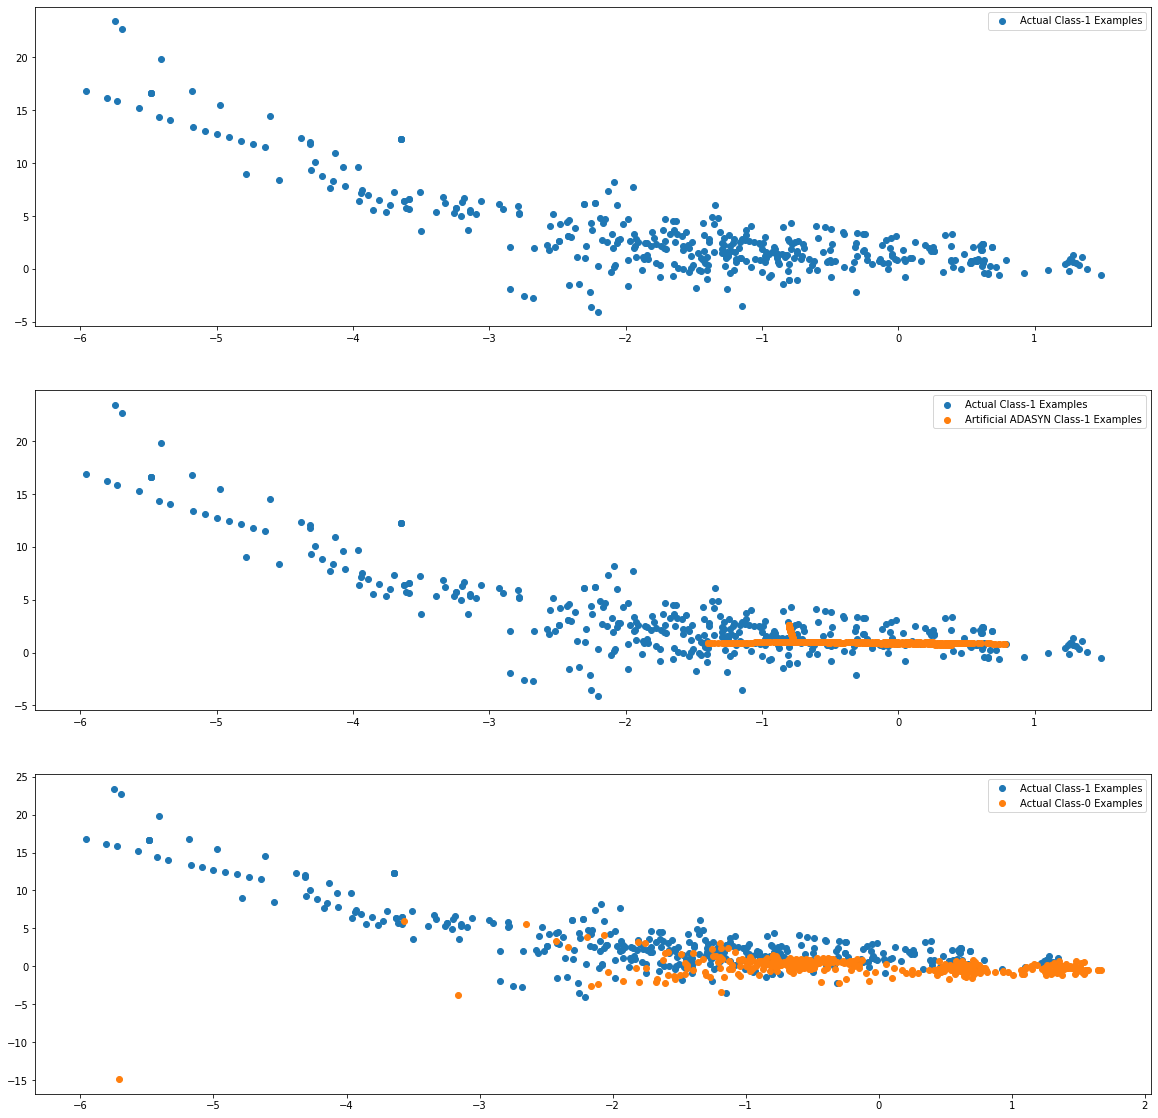

In [122]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [123]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters


##### Build models on other algorithms to see the better performing on ADASYN

#### 1. Logistic Regression on balanced data with ADASYN

In [124]:
# Creating KFold object with 3 splits
Nfolds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = Nfolds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9577348184986589
Best hyperparameters:  {'C': 100}


In [125]:
# cross validation results
res_cv = pd.DataFrame(model_cv.cv_results_)
res_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.095033,0.092627,0.054446,0.002632,0.01,{'C': 0.01},0.957500,0.957836,0.957716,0.957684,0.000139,6,0.957857,0.957595,0.957695,0.957716,0.000108
1,1.321340,0.121380,0.056372,0.005871,0.1,{'C': 0.1},0.957557,0.957884,0.957755,0.957732,0.000134,5,0.957912,0.957634,0.957746,0.957764,0.000114
2,1.243163,0.154823,0.053997,0.008203,1,{'C': 1},0.957560,0.957888,0.957756,0.957734,0.000135,4,0.957914,0.957636,0.957748,0.957766,0.000114
3,1.256064,0.035449,0.049329,0.002715,10,{'C': 10},0.957560,0.957888,0.957756,0.957735,0.000135,3,0.957915,0.957636,0.957748,0.957767,0.000115
4,1.314804,0.132458,0.072662,0.024358,100,{'C': 100},0.957560,0.957888,0.957756,0.957735,0.000135,1,0.957915,0.957636,0.957748,0.957767,0.000115
5,1.256046,0.087521,0.051798,0.004372,1000,{'C': 1000},0.957560,0.957888,0.957756,0.957735,0.000135,2,0.957915,0.957636,0.957748,0.957767,0.000115


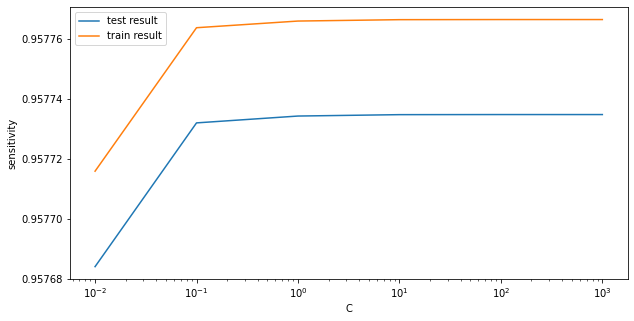

In [127]:
# plot of C versus train and validation scores

plt.figure(figsize=(10, 5))
plt.plot(res_cv['param_C'], res_cv['mean_test_score'])
plt.plot(res_cv['param_C'], res_cv['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [128]:
#Logistic Regression with optimal C
model_cv.best_params_

{'C': 100}

In [129]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [130]:
#Evaluating the model with train data
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
showRes(y_train_adasyn, y_train_pred)

F1 Score results: 88.58%
Classification Report Results: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    227441
           1       0.90      0.87      0.89    227427

    accuracy                           0.89    454868
   macro avg       0.89      0.89      0.89    454868
weighted avg       0.89      0.89      0.89    454868



In [132]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
showRes(y_test, y_pred)

F1 Score results: 3.03%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56874
           1       0.02      0.95      0.03        88

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



#### Model Summary

Train set
ROC score : 96%
F1 score: 89.2%

Test set
ROC score : 98%
F1 score: 3.23%

#### 2. Decision Tree on balanced data with ADASYN

In [134]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
desctree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = desctree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [135]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9373303223792535
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


#### Model with optimal hyperparameters

In [136]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [138]:
#Evaluating the model on train data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
showRes(y_train_adasyn, y_train_pred)

F1 Score results: 97.79%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    227441
           1       0.96      1.00      0.98    227427

    accuracy                           0.98    454868
   macro avg       0.98      0.98      0.98    454868
weighted avg       0.98      0.98      0.98    454868



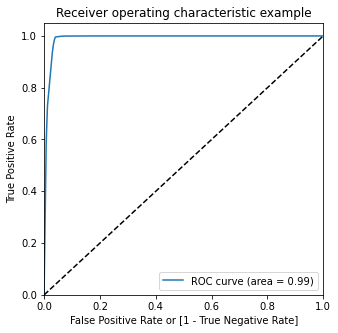

In [139]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
roc_curve(y_train_adasyn, y_train_pred_proba)

In [140]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
showRes(y_test, y_pred)

F1 Score results: 5.68%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56874
           1       0.03      0.81      0.06        88

    accuracy                           0.96     56962
   macro avg       0.51      0.88      0.52     56962
weighted avg       1.00      0.96      0.98     56962



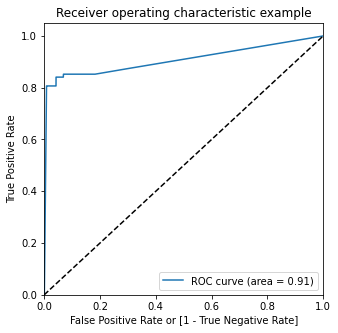

In [141]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

#### Model Summary

Train set
ROC score : 99%
F1 score: 97.79%

Test set
ROC score : 95%
F1 score: 7.05%

### 3. XGBoost on balanced data with ADASYN

In [142]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[21:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:34:26]

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [143]:
# cv results
resCv = pd.DataFrame(model_cv.cv_results_)
resCv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.538251,0.234047,0.083665,0.009014,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.995327,0.970279,0.987535,0.984381,0.010466,6,0.998849,0.999171,0.999105,0.999042,0.000139
1,23.293733,0.136154,0.085534,0.002328,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.995141,0.974992,0.987728,0.985953,0.008321,4,0.998912,0.999269,0.999131,0.999104,0.000147
2,28.736020,0.399188,0.095183,0.013627,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.995296,0.974510,0.987452,0.985753,0.008570,5,0.998893,0.999346,0.999062,0.999100,0.000187
3,17.194809,0.454181,0.087527,0.005156,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.998498,0.973353,0.991895,0.987916,0.010644,3,0.999924,0.999932,0.999924,0.999927,0.000003
4,24.740011,0.745999,0.085256,0.009080,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.998572,0.977260,0.992188,0.989340,0.008930,2,0.999918,0.999945,0.999951,0.999938,0.000014
5,29.651800,1.017084,0.085863,0.003529,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.998324,0.980023,0.994021,0.990789,0.007813,1,0.999937,0.999963,0.999954,0.999952,0.000011


In [144]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9907893290894081
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [145]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [146]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params_list = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params_list)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[22:22:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:22:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

F1 Score results: 100.0%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227441
           1       1.00      1.00      1.00    227427

    accuracy                           1.00    454868
   macro avg       1.00      1.00      1.00    454868
weighted avg       1.00      1.00      1.00    454868



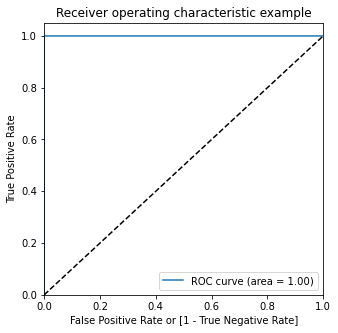

F1 Score results: 76.44%
Classification Report Results: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56874
           1       0.71      0.83      0.76        88

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [149]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
showRes(y_train_adasyn, y_train_pred)
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
roc_curve(y_train_adasyn, y_train_pred_proba)
#Evaluating on test data
y_pred = xgb_adasyn_model.predict(X_test)
showRes(y_test, y_pred)

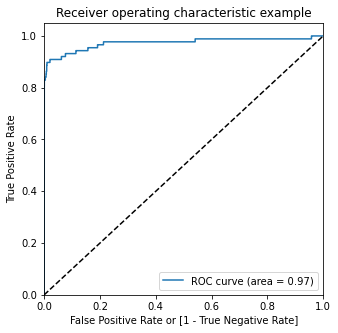

In [150]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
roc_curve(y_test, y_test_pred_proba)

#### Model Summary

Train set
ROC score : 100.0%
F1 score: 100.0%

Test set
ROC score : 99%
F1 score: 81.16%

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

Based on the results from all the model summaries above we can see that the XGBoost model with Adasyn is the best performing  model.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


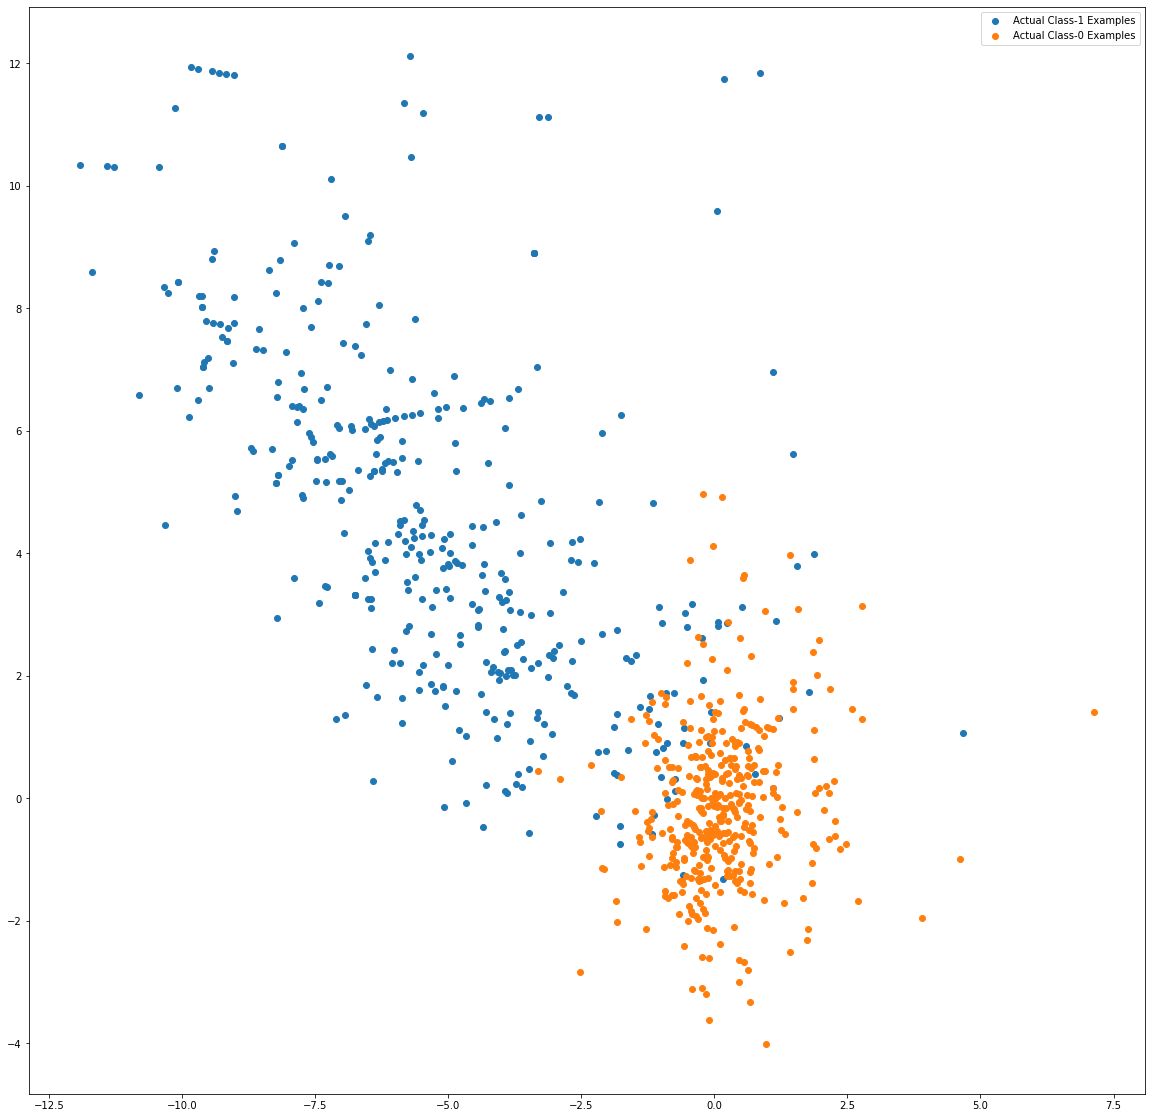

In [151]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [152]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.73692703


#### Here, we need to zero in on a high recall to identify genuine false exchanges to save the banks from high-esteem fake exchanges.After trying several models, we can clearly infer that after balancing the dataset with the ADASYN technique the XGBoost model has a score of 99% for the ROC and recall of 86%. Hence XGBoost has proved to be the optimal model in our case